# Home Loan Assessment

In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import sqlite3
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

In [2]:
#load the data into dataframe
home_loan = pd.read_csv("C:\\DataSets\\HomeLoan.csv", sep='|')
home_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
home_loan.shape
home_loan.head()
home_loan.describe()

(614, 13)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
#Make credit_history categorical
home_loan['Credit_History'] = home_loan['Credit_History'].astype('object')
home_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null object
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 62.4+ KB


In [5]:
home_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [6]:
#Check for NAN

In [7]:
pd.isnull(home_loan).any()
pd.isnull(home_loan).sum()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#check the count
home_loan['Gender'].value_counts()
home_loan['Married'].value_counts()
home_loan['Education'].value_counts()
home_loan['Credit_History'].value_counts()
home_loan['Property_Area'].value_counts()
home_loan['Loan_Status'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
#Impute Gender
#no of males is quite high compared to female, so impute missing values in gender with Male
home_loan.Gender = home_loan.Gender.fillna('Male')

In [10]:
pd.isnull(home_loan).sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#Impute Dependents
home_loan['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
#as Dependents = 0 have more no of records, so we will imput missing values of Dependents with 0
home_loan.Dependents = home_loan.Dependents.fillna('0')

In [13]:
pd.isnull(home_loan).sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
#Impute Self-Employed

In [15]:
home_loan['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [16]:
#Self-Employed=No is more, so impute value as Self-Employed= No for blank records
home_loan.Self_Employed = home_loan.Self_Employed.fillna('No')
pd.isnull(home_loan).sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
#Impute Married
home_loan['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [18]:
#As No of Married count is more, so impute with value = Yes
home_loan.Married = home_loan.Married.fillna('Yes')
pd.isnull(home_loan).sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
#Impute Credit_History
home_loan['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [20]:
#table = pd.pivot_table(home_loan, values='Loan_ID', index='Credit_History',columns='Self_Employed', aggfunc='count')
#table

In [21]:
#As No of Credit Hisoty = 1 is more, so impute with value = 1
home_loan.Credit_History = home_loan.Credit_History.fillna('1')
#convert to categorical againa
home_loan['Credit_History'] = home_loan['Credit_History'].astype('object')
pd.isnull(home_loan).sum()
home_loan.info()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       614 non-null object
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 62.4+ KB


In [23]:
#home_loan_ApplicantIncome = home_loan.loc['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status','ApplicantIncome']
#home_loan_CoapplicantIncome = home_loan.loc['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status','CoapplicantIncome']
#home_loan_LoanAmount = home_loan.loc['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status','LoanAmount']
#home_loan_Loan_Amount_Term = home_loan.loc['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status','Loan_Amount_Term']


In [24]:
pd.isnull(home_loan).sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#Impute numerical columns LoanAmount and Loan_Amount_Term after removing outliers

#Check Outlier for ApplicantIncome

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011E3A3C8>]], dtype=object)

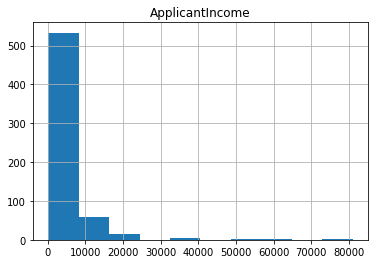

In [25]:
home_loan.hist(column='ApplicantIncome')

In [26]:
#remove the outliers related to ApplicantIncome
home_loan[home_loan['ApplicantIncome'] > 25000].Loan_ID.count()

7

In [27]:
home_loan1 = home_loan[home_loan['ApplicantIncome'] < 25000]
home_loan1.shape

(607, 13)

In [28]:
#Compare after removing outliers
home_loan.describe()
home_loan1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,607.000000,607.000000,585.000000,593.000000
mean,4894.420099,1632.116837,143.579487,342.495784
std,3473.383803,2935.906180,78.894204,64.782201
min,150.000000,0.000000,9.000000,12.000000
25%,2874.000000,0.000000,100.000000,360.000000
50%,3762.000000,1229.000000,127.000000,360.000000
75%,5705.500000,2304.000000,165.000000,360.000000
max,23803.000000,41667.000000,650.000000,480.000000


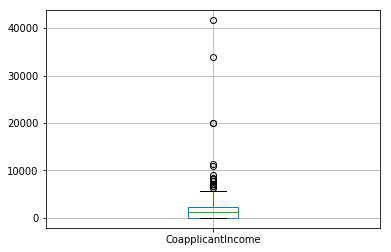

In [29]:
#Check outlier for CoapplicantIncome
home_loan1.boxplot(column='CoapplicantIncome')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001193F518>]], dtype=object)

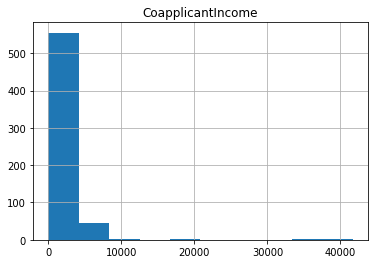

In [30]:
home_loan1.hist(column='CoapplicantIncome')

In [31]:
home_loan1[home_loan1['CoapplicantIncome']>9000].Loan_ID.count()

6

In [32]:
home_loan2 = home_loan1[home_loan1['CoapplicantIncome']<9000]

In [33]:
#compare after removing outliers
home_loan1.describe()
home_loan2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,607.000000,607.000000,585.000000,593.000000
mean,4894.420099,1632.116837,143.579487,342.495784
std,3473.383803,2935.906180,78.894204,64.782201
min,150.000000,0.000000,9.000000,12.000000
25%,2874.000000,0.000000,100.000000,360.000000
50%,3762.000000,1229.000000,127.000000,360.000000
75%,5705.500000,2304.000000,165.000000,360.000000
max,23803.000000,41667.000000,650.000000,480.000000


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,601.000000,601.000000,579.000000,587.000000
mean,4902.169717,1419.172912,142.259067,342.623509
std,3464.451899,1683.676831,76.832325,64.745759
min,150.000000,0.000000,9.000000,12.000000
25%,2882.000000,0.000000,100.000000,360.000000
50%,3775.000000,1167.000000,127.000000,360.000000
75%,5708.000000,2253.000000,164.500000,360.000000
max,23803.000000,8980.000000,650.000000,480.000000


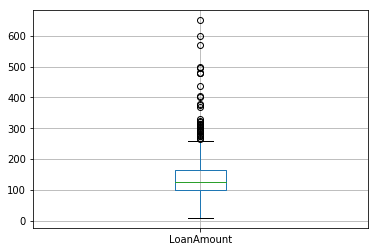

In [34]:
#remove the outliers related to LoanAmount
home_loan2.boxplot(column='LoanAmount')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011CCA898>]], dtype=object)

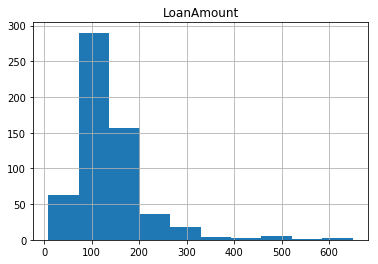

In [35]:
home_loan2.hist(column='LoanAmount')

In [36]:
home_loan2[home_loan2['LoanAmount']>500].Loan_ID.count()

3

In [37]:
home_loan3 = home_loan2[home_loan2['LoanAmount']<500]

In [38]:
#compare after removing outliers
home_loan2.describe()
home_loan3.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,601.000000,601.000000,579.000000,587.000000
mean,4902.169717,1419.172912,142.259067,342.623509
std,3464.451899,1683.676831,76.832325,64.745759
min,150.000000,0.000000,9.000000,12.000000
25%,2882.000000,0.000000,100.000000,360.000000
50%,3775.000000,1167.000000,127.000000,360.000000
75%,5708.000000,2253.000000,164.500000,360.000000
max,23803.000000,8980.000000,650.000000,480.000000


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,575.000000,575.000000,575.000000,561.000000
mean,4782.808696,1434.175513,139.213913,342.459893
std,3211.609967,1690.538743,67.669682,65.021498
min,150.000000,0.000000,9.000000,12.000000
25%,2885.500000,0.000000,100.000000,360.000000
50%,3750.000000,1229.000000,126.000000,360.000000
75%,5672.000000,2264.500000,162.000000,360.000000
max,23803.000000,8980.000000,496.000000,480.000000


In [39]:
#home_loan3.boxplot(column='Loan_Amount_Term')

In [40]:
pd.isnull(home_loan3).sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013E9CB70>]], dtype=object)

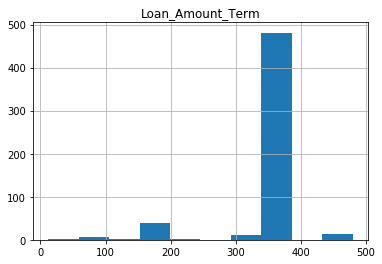

In [41]:
#Impute Loan_Amount_Term
home_loan3.hist(column='Loan_Amount_Term')

In [42]:
home_loan3['Loan_Amount_Term'].fillna((home_loan3['Loan_Amount_Term'].mean()), inplace=True)
pd.isnull(home_loan3).sum()

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [47]:
#reference is http://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/

In [49]:
#table = pd.pivot_table(home_loan3, values='Loan_ID', index='Credit_History',aggfunc='count')
#table

#reference is https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

#Note when to use which test
Predictor                Target Variable
Variable            Quantitative              Categorical

Quantitative        Pearson Correleation      Chi-Square Test*
Categorical         Anova                     Chi-Square Test

*in this case first you need to categorize your quantitative predictor with only two levels and then you can apply the Chi-Square Test of independence.

### Check if credit history has any impact in Loan Status..start>>>

In [43]:
credit_loanstat = pd.crosstab(home_loan3["Credit_History"],home_loan3["Loan_Status"],margins=True)
credit_loanstat

Loan_Status,N,Y,All
Credit_History,,,
0.0,76,6,82
1.0,85,361,446
1,11,36,47
All,172,403,575


In [44]:
#prove statistically that there is dependency by using chi-square test
import scipy.stats as scs
print("chi-square value, p value, expected counts")
cs1 = scs.chi2_contingency(credit_loanstat)
print(cs1)

chi-square value, p value, expected counts
(180.12093437778944, 3.1982925523417046e-36, 6, array([[  24.52869565,   57.47130435,   82.        ],
       [ 133.41217391,  312.58782609,  446.        ],
       [  14.05913043,   32.94086957,   47.        ],
       [ 172.        ,  403.        ,  575.        ]]))


#The above result confirms that as Chi-square value is high and p value<=0.05, so we reject the null hypthesis
and confirm that there is significant dependency between Credit_History and Loan_Status

### Check if credit history has any impact in Loan Status..end<<<

### Check if average loan amount same across different gender..start>>>

In [45]:
home_loan3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1,Urban,Y


In [46]:
avg_loan_gender = pd.pivot_table(home_loan3, values='LoanAmount', index='Gender',aggfunc=np.mean)
avg_loan_gender

,LoanAmount
Gender,
Female,120.186916
Male,143.564103


As per above resulet, For Gender = Male, Avg Loan amount is higer than Gender = Female.
now we will prove it statistically

Null Hypothesis is there is no relationship between Gender and Loan Amount
Alternative Hypothesis is there is relationship between Gender and Loan Amount
reference is https://analyticsdefined.com/anova-test-part-1/

#Check how far apart the group means are from each other

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


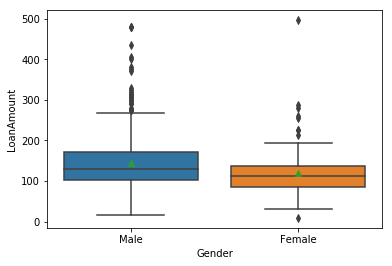

In [47]:
#visualize the data using boxplot
sns.boxplot(x=home_loan3['Gender'], y=home_loan3['LoanAmount'],showmeans=True)

From the above box plot, we can now say that we have evidence against the null hypothesis and
the variables are related to each other
But there is an important question to answer “Are the differences among the group means are due to true 
differences between the group means of the population or it is merely due to sampling variability or by chance?”
To answer this above question, we do not only need to measure the variation among the group 
means but also, we need to measure the variation among the group means relative to the variation 
within the groups (you can visualize this by length the box of each group in the above boxplots, 
more is the length of the boxplot more is the variability in that group and vice versa).
F statistic value is F = (Variation among Group Means)/(Variation within group)
When the variation within a group is large, then the variation among the sample means become negligible. 
In that case, the data will provide less evidence against the null hypothesis. Similarly, when the variation within the group is small then the variation among group means dominates. And then the data provide strong evidence for the relationship between the predictor and target variables and we can reject the null hypothesis. So higher F statistic implies a relationship between the variables. But how high the F statistic should be? The answer to this question lies in the concept of the p-value. P- value is defined as the probability of getting that observed F-statistic (after the ANOVA test) or more extreme value of F-statistic provided the null hypothesis is true. So, if we get very less p-value, it means it is extremely rare to get that F-statistic when the null hypothesis is true (sometimes it may occur which is also known as Type I error) and we can reject the null hypothesis. Generally, we take the cutoff for p-value as 0.05 (which is 95% significance level). Let’s now do this in python

In [48]:
#Anova F-Test
model = smf.ols(formula = 'LoanAmount ~ Gender', data = home_loan3)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     10.57
Date:                Sun, 07 Jan 2018   Prob (F-statistic):            0.00122
Time:                        07:28:09   Log-Likelihood:                -3233.6
No. Observations:                 575   AIC:                             6471.
Df Residuals:                     573   BIC:                             6480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        120.1869      6.488     18.524      0.000     107.444     132.930
Gender[T.Male]    23.3772      7.192      3.251      0.001       9.252      37.502
==============================================================================
Omnibus:                      245.373   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1192.879
Skew:                           1.881   Prob(JB):                    9.32e-260
Kurtosis:                       8.970   Cond. No.                         4.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As per above result, as p value (Prob(F-Statistic) is less than 0.05 and F-Statistic is high, we can conclude that there is relationship between the catgorical predictor variable Gender and quantitive target variable LoanAmount

### Check if average loan amount same across different gender..end<<<

### Check if average loan amount is same for Married and Un-Married people..start>>>

In [49]:
avg_loan_married = pd.pivot_table(home_loan3, values = 'LoanAmount', index = 'Married', aggfunc=np.mean)
avg_loan_married

,LoanAmount
Married,
No,125.398010
Yes,146.639037


As per above result, For Married = Yes, Avg Loan Amount is higher than Married = No
Now prove it statistically
Null Hypothesis is there is no relationship between Married and Loan Amount
Alternative Hypothesis is there is relationship between Married and Loan Amount
Check how far apart the group means are from each other

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


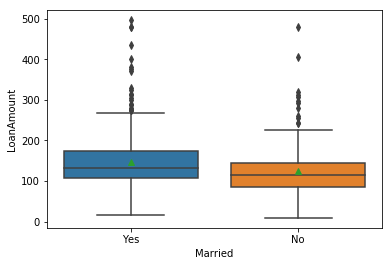

In [50]:
#visualize the data
sns.boxplot(x=home_loan3['Married'], y=home_loan3['LoanAmount'],showmeans=True)

From the above boxplot, it can be inferred that there is relationship between the 2 variables
Provide this statistically as explained below

In [51]:
#Run Anova F-Test
model = smf.ols(formula = 'LoanAmount ~ Married', data = home_loan3)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     13.15
Date:                Sun, 07 Jan 2018   Prob (F-statistic):           0.000312
Time:                        07:28:40   Log-Likelihood:                -3232.3
No. Observations:                 575   AIC:                             6469.
Df Residuals:                     573   BIC:                             6477.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        125.3980      4.723     26.549      0.000     116.121     134.675
Married[T.Yes]    21.2410      5.857      3.627      0.000       9.738      32.744
==============================================================================
Omnibus:                      245.578   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1172.473
Skew:                           1.891   Prob(JB):                    2.52e-255
Kurtosis:                       8.885   Cond. No.                         3.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As F-Statistic is high and p value is less than 0.05, it can be concluded that there is relationship between
Married and Loan Amount

### Check if average loan amount is same for Married and Un-Married people..end<<<

### Build Logistic Rgeression Model..Start>>>

In [52]:
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [53]:
home_loan3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              575 non-null object
Gender               575 non-null object
Married              575 non-null object
Dependents           575 non-null object
Education            575 non-null object
Self_Employed        575 non-null object
ApplicantIncome      575 non-null int64
CoapplicantIncome    575 non-null float64
LoanAmount           575 non-null float64
Loan_Amount_Term     575 non-null float64
Credit_History       575 non-null object
Property_Area        575 non-null object
Loan_Status          575 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 82.9+ KB


In [54]:
home_loan3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1,Urban,Y


In [55]:
#find no of customers with Loan_Status = Y vs N
print("No of customer with Loan_Status")
home_loan3.groupby("Loan_Status").size()

No of customer with Loan_Status


Loan_Status
N    172
Y    403
dtype: int64

In [56]:
#Convert Loan_Status from (Yes, No) to (0,1)
le = preprocessing.LabelEncoder()
le.fit(home_loan3['Loan_Status'])
list(le.classes_)

LabelEncoder()

['N', 'Y']

In [57]:
dfn = le.transform(home_loan3['Loan_Status'])
dfn
type(dfn)

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0,

numpy.ndarray

In [58]:
#create a copy of df
home_loan4 = home_loan3.copy(deep=True)
home_loan4.info()
home_loan4.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              575 non-null object
Gender               575 non-null object
Married              575 non-null object
Dependents           575 non-null object
Education            575 non-null object
Self_Employed        575 non-null object
ApplicantIncome      575 non-null int64
CoapplicantIncome    575 non-null float64
LoanAmount           575 non-null float64
Loan_Amount_Term     575 non-null float64
Credit_History       575 non-null object
Property_Area        575 non-null object
Loan_Status          575 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 62.9+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1,Urban,Y


In [59]:
#create a new dependent variable
home_loan4['Y'] = dfn
home_loan4.info()
home_loan4.columns


<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 1 to 613
Data columns (total 14 columns):
Loan_ID              575 non-null object
Gender               575 non-null object
Married              575 non-null object
Dependents           575 non-null object
Education            575 non-null object
Self_Employed        575 non-null object
ApplicantIncome      575 non-null int64
CoapplicantIncome    575 non-null float64
LoanAmount           575 non-null float64
Loan_Amount_Term     575 non-null float64
Credit_History       575 non-null object
Property_Area        575 non-null object
Loan_Status          575 non-null object
Y                    575 non-null int64
dtypes: float64(3), int64(2), object(9)
memory usage: 67.4+ KB


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Y'],
      dtype='object')

In [60]:
#convert from df to excel for reference
writer = pd.ExcelWriter("C:\\DataSets\\HomeLoan_temp1.xlsx")
home_loan4.to_excel(writer,'Sheet1')
writer.save()

In [61]:
#Separate Independent categorical variables for conversion into numerical
x_catg  = home_loan4.loc[:,('Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area')]
x_catg.head()
x_catg.shape

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area
1,Male,Yes,Graduate,No,1,Rural
2,Male,Yes,Graduate,Yes,1,Urban
3,Male,Yes,Not Graduate,No,1,Urban
4,Male,No,Graduate,No,1,Urban
5,Male,Yes,Graduate,Yes,1,Urban


(575, 6)

In [62]:
#Separate Independent numerical variables
#x_num = home_loan3.loc[:,('ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term')]
#x_num.head()

In [63]:
#Convert categorical vars to dummy coding
x = pd.get_dummies(x_catg)
x.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,0,1,0,1,1,0,1,0,0,1,0,1,0,0
2,0,1,0,1,1,0,0,1,0,1,0,0,0,1
3,0,1,0,1,0,1,1,0,0,1,0,0,0,1
4,0,1,1,0,1,0,1,0,0,1,0,0,0,1
5,0,1,0,1,1,0,0,1,0,1,0,0,0,1


In [64]:
#create a copy of df
home_loan5 = home_loan4.copy(deep=True)
#home_loan4.info()
#home_loan4.head()

In [65]:
home_loan5.Credit_History.replace((1.0, 0.0), ('Yes', 'No'), inplace=True)

In [66]:
home_loan5['Credit_History'].value_counts()

Yes    446
No      82
1       47
Name: Credit_History, dtype: int64

In [67]:
#convert from df to excel for reference
writer = pd.ExcelWriter("C:\\DataSets\\HomeLoan_temp3.xlsx")
home_loan5.to_excel(writer,'Sheet1')
writer.save()

In [69]:
#for some reason, 1 is stored as string..make the changes accordingly
home_loan5.Credit_History.replace(('1'), ('Yes'), inplace=True)
home_loan5['Credit_History'].value_counts()

Yes    493
No      82
Name: Credit_History, dtype: int64

In [70]:
#Separate Independent categorical variables for conversion into numerical
x_catg  = home_loan5.loc[:,('Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area')]
x_catg.head()
x_catg.shape

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area
1,Male,Yes,Graduate,No,Yes,Rural
2,Male,Yes,Graduate,Yes,Yes,Urban
3,Male,Yes,Not Graduate,No,Yes,Urban
4,Male,No,Graduate,No,Yes,Urban
5,Male,Yes,Graduate,Yes,Yes,Urban


(575, 6)

In [71]:
#Convert categorical vars to dummy coding
x_num1 = pd.get_dummies(x_catg)
x_num1.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_No,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,0,1,0,1,1,0,1,0,0,1,1,0,0
2,0,1,0,1,1,0,0,1,0,1,0,0,1
3,0,1,0,1,0,1,1,0,0,1,0,0,1
4,0,1,1,0,1,0,1,0,0,1,0,0,1
5,0,1,0,1,1,0,0,1,0,1,0,0,1


In [72]:
#Separate Independent numerical variables
#x_num = home_loan5.loc[:,('ApplicantIncome', 'CoapplicantIncome')]
#x_num.head()
x = x_num1

In [73]:
#Get all Xs together
#x = pd.concat([x_num1,x_num], axis = 1)
#x.head()

In [75]:
#convert dependent variable
y = home_loan5['Y']
y.head()
type(y)

1    0
2    1
3    1
4    1
5    1
Name: Y, dtype: int64

pandas.core.series.Series

In [83]:
#Create train and test data
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = 1)
train_x.shape[0]
test_x.shape[0]
train_y.shape[0]
test_y.shape[0]
type(train_x)

431

144

431

144

pandas.core.frame.DataFrame

In [77]:
#Build logistic regression model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [78]:
log.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
log.coef_

array([[-0.06804811, -0.08522136, -0.37994667,  0.22667721,  0.04207443,
        -0.19534389, -0.022568  , -0.13070147, -1.91609364,  1.76282418,
        -0.58141102,  0.62317777, -0.19503621]])

In [80]:
#find out key indicator of Loan_Status

In [81]:
coeff = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(log.coef_))], axis = 1)
coeff.columns = ("Variable", "Coeff")
coeff.sort_values('Variable', ascending = True)

,Variable,Coeff
8,Credit_History_No,-1.916094
9,Credit_History_Yes,1.762824
4,Education_Graduate,0.042074
5,Education_Not Graduate,-0.195344
0,Gender_Female,-0.068048
1,Gender_Male,-0.085221
2,Married_No,-0.379947
3,Married_Yes,0.226677
10,Property_Area_Rural,-0.581411
11,Property_Area_Semiurban,0.623178


In [107]:
#Generate Model Diagnostics
pred_y = log.predict(test_x)
print(classes.size)
print("Positive Cases in test data", test_y[test_y == 1]. shape[0])
print("Negative Cases in test data", test_y[test_y == 0]. shape[0])

144
Positive Cases in test data 103
Negative Cases in test data 41


In [ ]:
#Precision and Recall

In [108]:
print("Accuracy Score")
print(metrics.accuracy_score(test_y, pred_y))

Accuracy Score
0.826388888889


In [110]:
print("precision/recalls metrics")
print(metrics.classification_report(test_y, pred_y))

precision/recalls metrics
             precision    recall  f1-score   support

          0       0.94      0.41      0.58        41
          1       0.81      0.99      0.89       103

avg / total       0.85      0.83      0.80       144



In [114]:
print("AUC")
auc = metrics.roc_auc_score(test_y, pred_y)
auc

AUC


0.70246270423869284

0.70246270423869284

(0, 1)

(0, 1)

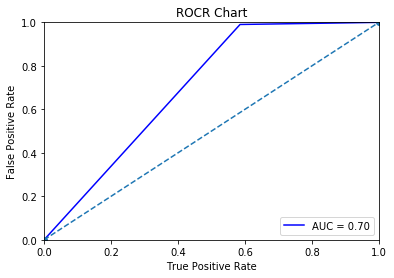

In [116]:
#ROC Chart
#false_positive_rate, true_positive_rate, threshold
fpr, tpr, th = roc_curve(test_y, pred_y)
roc_auc = metrics.auc(fpr, tpr)
roc_auc
plt.title('ROCR Chart')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.show()

Confusion matrix


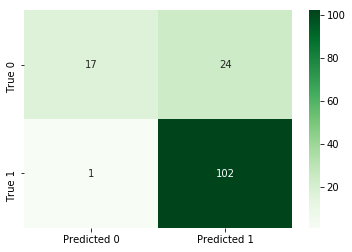

In [113]:
#confusion matrix
import matplotlib.pyplot as plt
print("Confusion matrix")
cf = metrics.confusion_matrix(test_y, pred_y)
lbl1 = ["Predicted 0", "Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot = True, cmap = "Greens", fmt = "d", xticklabels=lbl1, yticklabels=lbl2)
plt.show();

In [ ]:
#Here False Positive(Type I error) is 24 and False negative (Type II error) is 1

### Do feature engineering and try to build the model again..enc>>>